In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [89]:
SRC = '/Users/cmedina/Documents/cm/ufm/ml/course/datasets'
path = os.path.join(SRC,'wine.csv')

# Define function to load dataset
- We will use Pandas most of the time to manipulate data
- Pandas documentation is a good place to start

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

In [113]:
def load_data(filename):
    """ Load dataset from filename
    Args:
        filename (string): Path to data
        
    Returns:
        df (DataFrame): Dataset from file
    """
    print(filename)
    df = pd.read_csv(path)
    df = df.rename(columns={df.columns[0]:'Label'})
    return df


df = load_data(path)
df.head(3)

/Users/cmedina/Documents/cm/ufm/ml/course/datasets/wine.csv


Label  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0      1    14.23        1.71  2.43  15.6  127     2.80        3.06   
1      1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2      1    13.16        2.36  2.67  18.6  101     2.80        3.24   

   Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                  0.28     2.29       5.64  1.04  3.92     1065  
1                  0.26     1.28       4.38  1.05  3.40     1050  
2                  0.30     2.81       5.68  1.03  3.17     1185

# Check structure
- `head`
- `describe`
- Look for `nan` values

In [91]:
target = 'Proline'
df[target].unique()

array([1065, 1050, 1185, 1480,  735, 1450, 1290, 1295, 1045, 1510, 1280,
       1320, 1150, 1547, 1310, 1130, 1680,  845,  780,  770, 1035, 1015,
        830, 1195, 1285,  915, 1515,  990, 1235, 1095,  920,  880, 1105,
       1020,  760,  795,  680,  885, 1080,  985, 1060, 1260, 1265, 1190,
       1375, 1120,  970, 1270,  520,  450,  630,  420,  355,  678,  502,
        510,  750,  718,  870,  410,  472,  886,  428,  392,  500,  463,
        278,  714,  515,  495,  562,  625,  480,  290,  345,  937,  660,
        406,  710,  438,  415,  672,  315,  488,  312,  325,  607,  434,
        385,  407,  372,  564,  465,  365,  380,  378,  352,  466,  342,
        580,  530,  560,  600,  650,  695,  720,  590,  550,  855,  425,
        675,  640,  725,  620,  570,  615,  685,  470,  740,  835,  840])

In [92]:
df.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic.acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Acl                   178 non-null    float64
 4   Mg                    178 non-null    int64  
 5   Phenols               178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid.phenols  178 non-null    float64
 8   Proanth               178 non-null    float64
 9   Color.int             178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD                    178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [93]:
for i in df.columns:
    nan_percentage = round(100*df[df[i].isna()].shape[0]/df.shape[0],2)
    print('{0:<35} {1}'.format(i,nan_percentage))

Alcohol                             0.0
Malic.acid                          0.0
Ash                                 0.0
Acl                                 0.0
Mg                                  0.0
Phenols                             0.0
Flavanoids                          0.0
Nonflavanoid.phenols                0.0
Proanth                             0.0
Color.int                           0.0
Hue                                 0.0
OD                                  0.0
Proline                             0.0


In [94]:
# df = pd.read_csv(os.path.join(SRC,'autodf.csv')).drop(['Unnamed: 0'],axis=1)
# df.info()


# to_category  = df.select_dtypes(include='object').columns
# for col in to_category:
#     df[col] = df[col].astype('category')
# df.info()

# Plot the data
- Pandas: Simple plots.
- Matplotlib: Recommended. Takes practice to master.
- Seaborn: Work on top of Matplotlib. Can get good results with less work. Some details are complicated to customize.

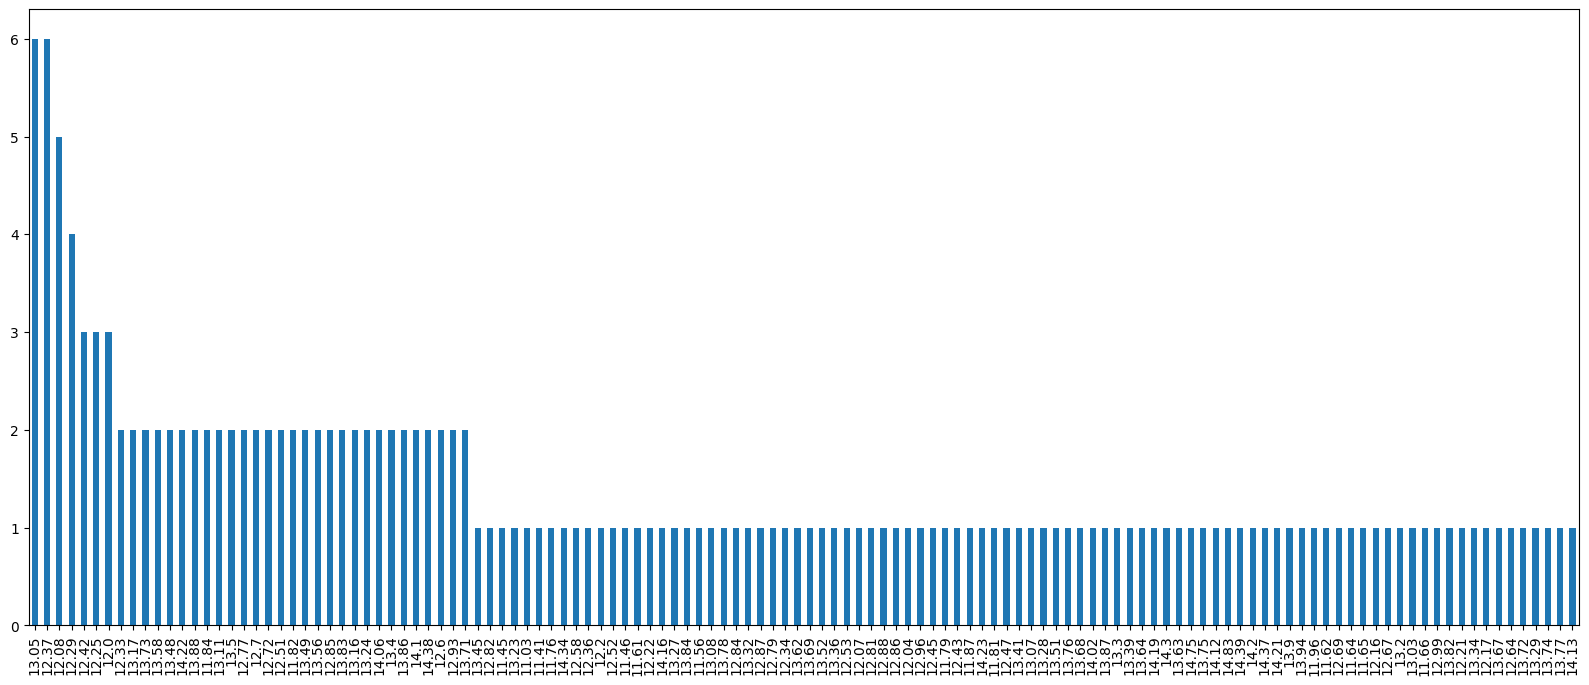

In [98]:
# pandas dataframe objcts have a Plot method
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html
df['Alcohol'].value_counts().plot(kind='bar',figsize=(20,8));

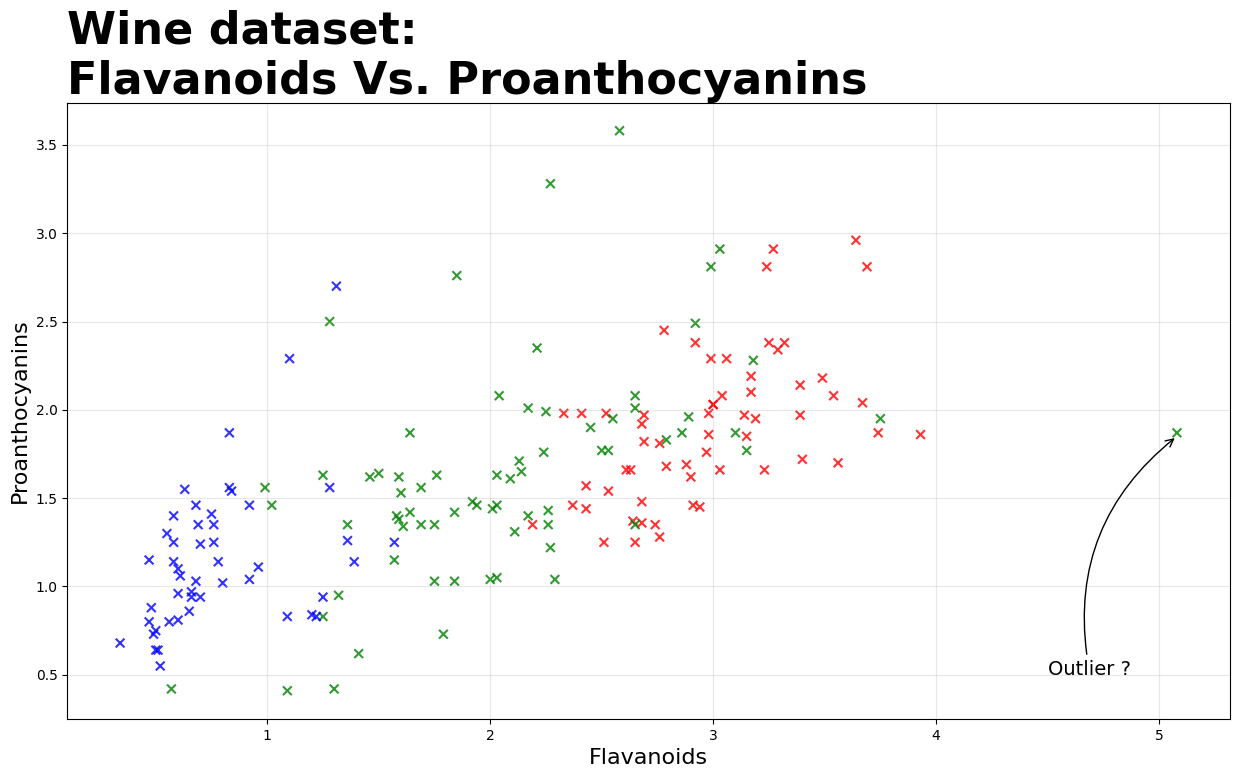

In [114]:
fig, ax = plt.subplots(figsize=(15,8))
x = df['Flavanoids']
y = df['Proanth']
colors = {1:'r',2:'g',3:'b'}
ax.scatter(x,y,color=df['Label'].map(colors),alpha=0.8,s=40,marker='x')
ax.set_title('Wine dataset:\nFlavanoids Vs. Proanthocyanins',fontsize=32,fontweight='bold',loc='left')
ax.set_xlabel('Flavanoids',fontsize=16)
ax.set_ylabel('Proanthocyanins',fontsize=16)
ax.grid(alpha=0.3)
arrowprops = dict(
    arrowstyle="->",
    connectionstyle="arc3,rad=-0.3")

ax.annotate('Outlier ?',(5.08,1.85),xytext=(4.5, 0.5),arrowprops=arrowprops,fontsize=14)
plt.show()

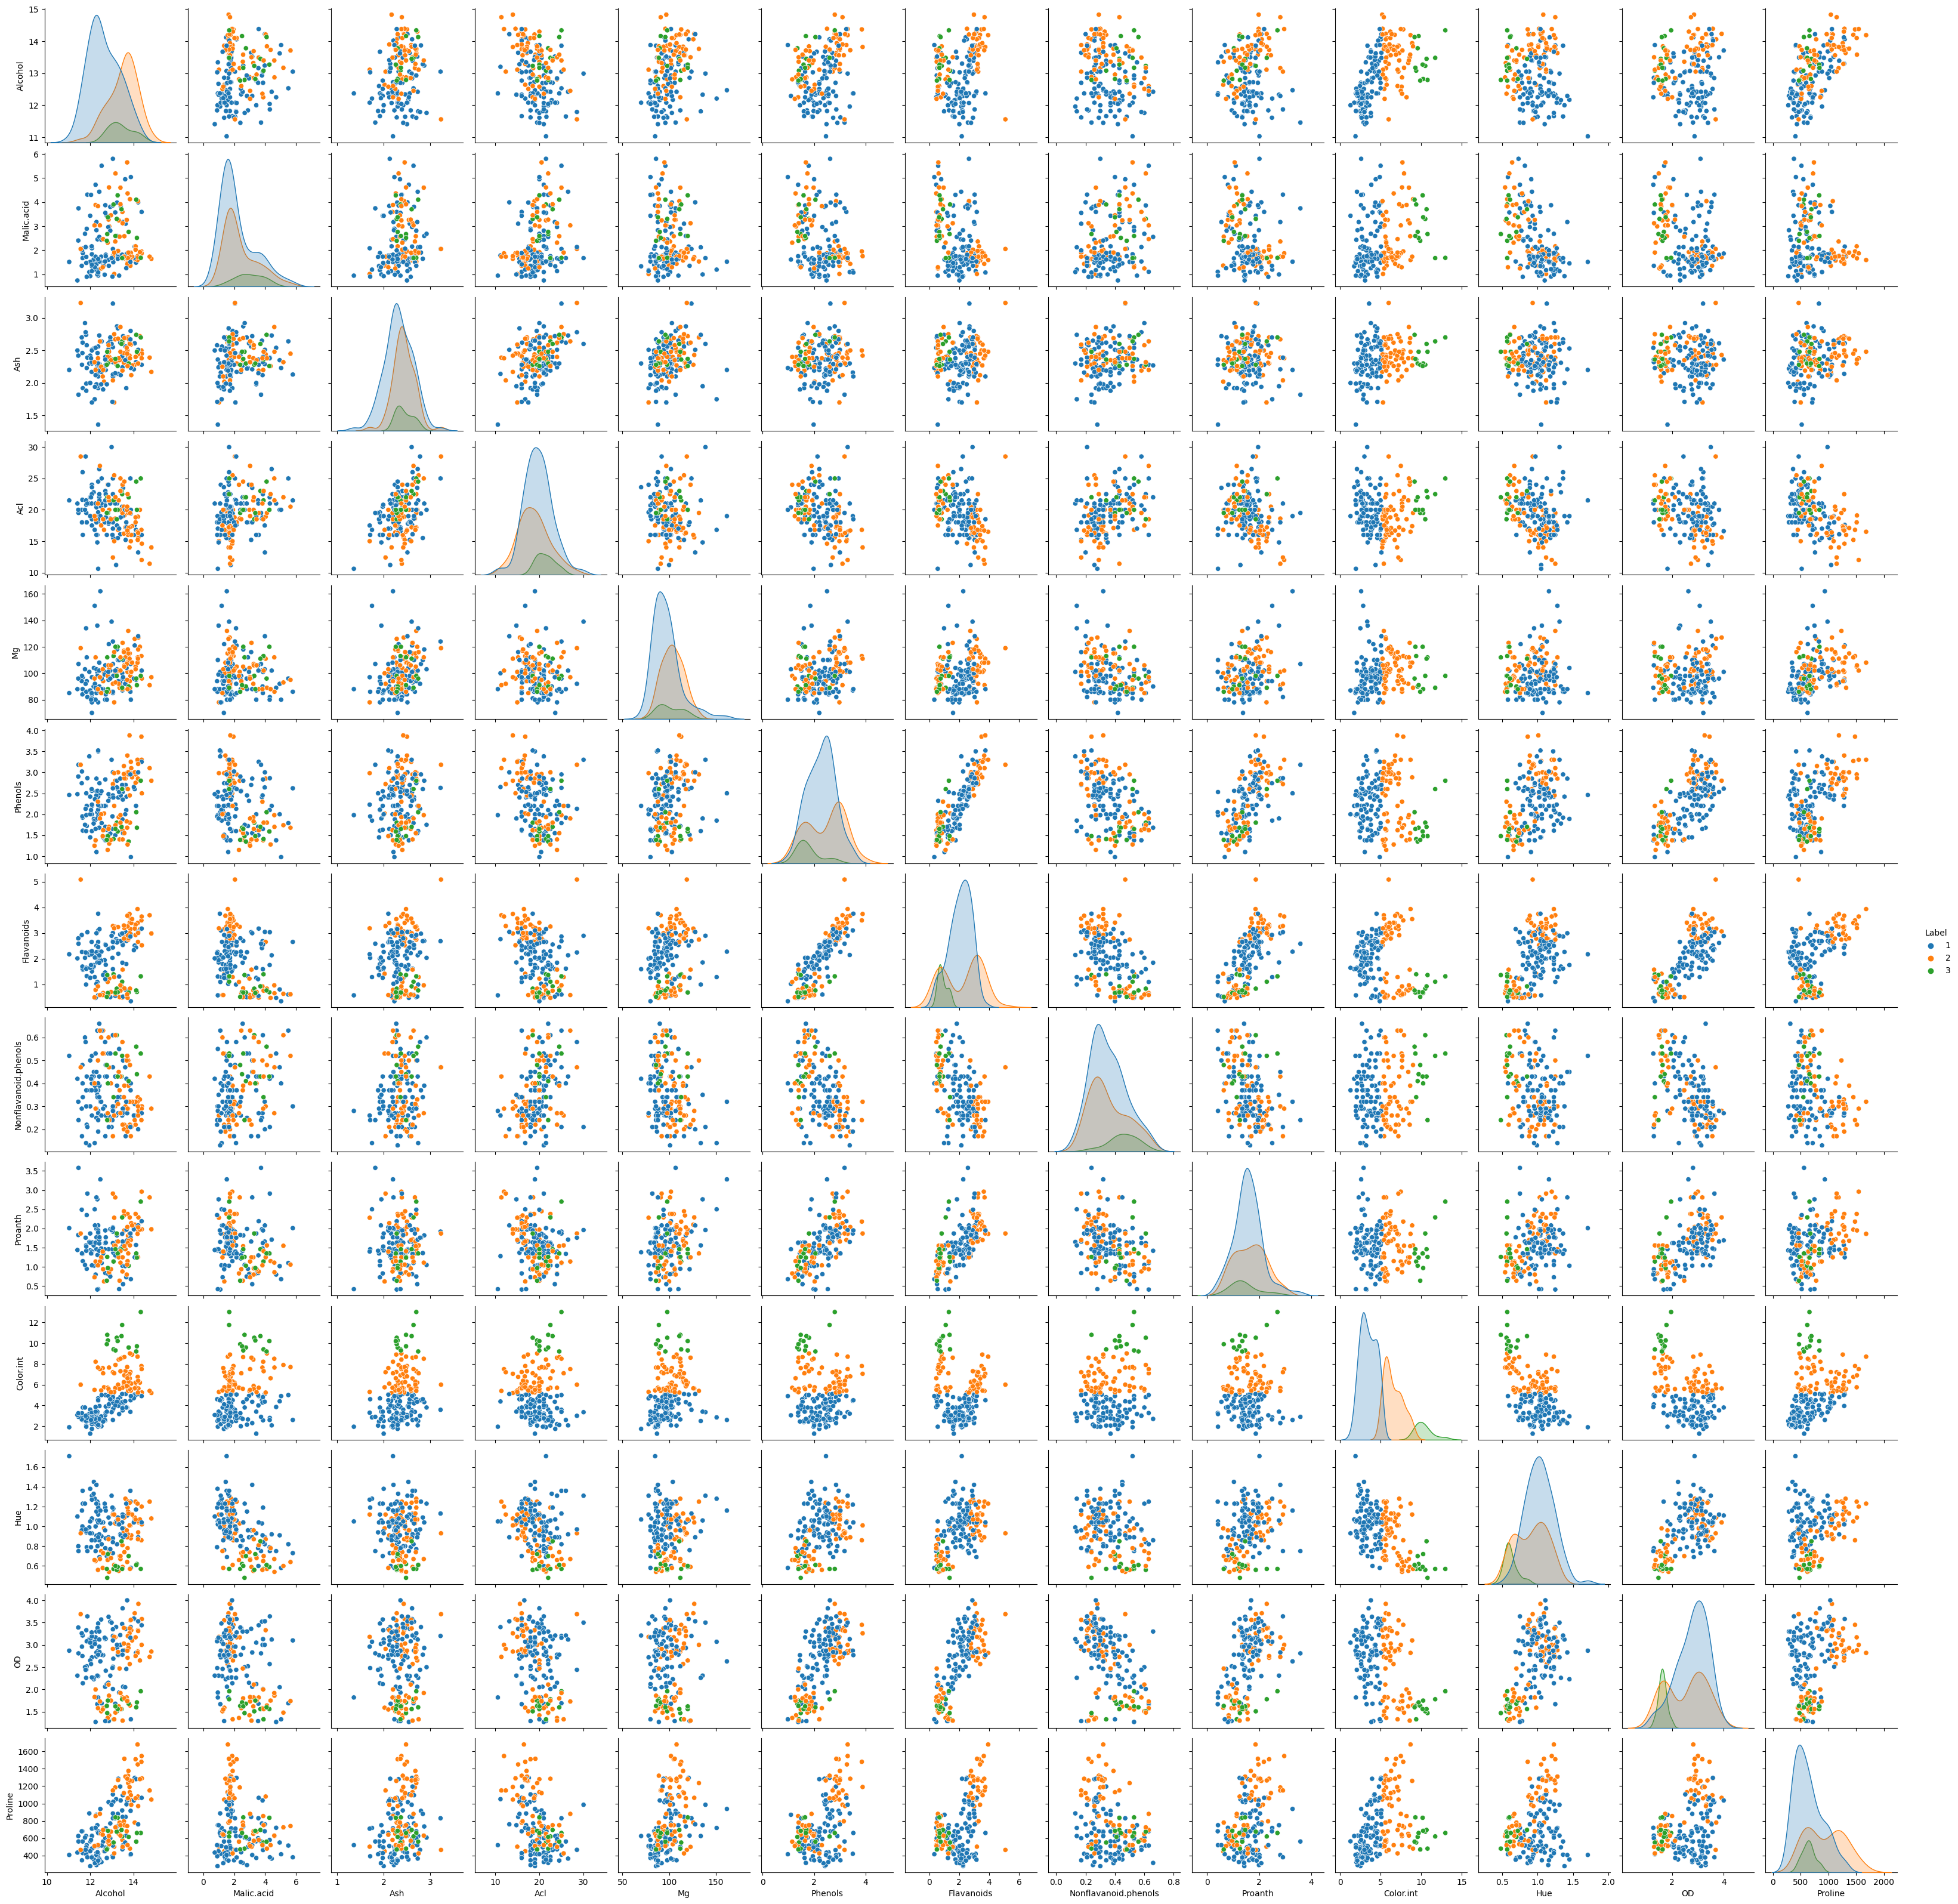

In [111]:
sns.pairplot(df,hue="Label");